In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import requests
import gzip
import lxml
import html5lib
from bs4 import BeautifulSoup

In [60]:
metadata_df_initial = pd.read_csv('../data/movie.metadata.tsv', sep="\t")
metadata_df_initial

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa..."
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""..."
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""..."
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."


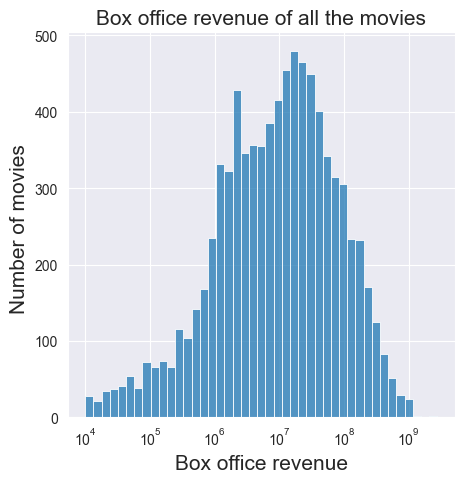

In [61]:
plt.figure(figsize=(5, 5))
plt.xlabel('Box office revenue', fontsize = 15)
plt.ylabel('Number of movies ', fontsize=15)
plt.title('Box office revenue of all the movies', fontsize=15)
revenues = metadata_df_initial['Movie box office revenue']
sns.histplot(data=revenues, log_scale=True)
plt.show()

In [81]:
metadata_df_initial['Movie release year'] = metadata_df_initial['Movie release date'].astype(str).str[:4]
metadata_df_initial = metadata_df_initial[metadata_df_initial["Movie release year"].str.contains("nan") == False]
metadata_df_initial['Movie release year'].astype(int)

groupped_years = metadata_df_initial.groupby('Movie release year')
profits_year = groupped_years['Movie box office revenue']
means_year = profits_year.mean()
sums_year = profits_year.sum()
means_year

C:\Users\diced\AppData\Local\Temp\ipykernel_21156\162125606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df_initial['Movie release year'] = metadata_df_initial['Movie release date'].astype(str).str[:4]


Movie release year
1010    1.216098e+07
1897    1.000000e+05
1914    7.079320e+05
1915    5.000000e+07
1920    4.500000e+06
            ...     
2008    6.071359e+07
2009    6.835295e+07
2010    7.008336e+07
2011    7.782684e+07
2012    1.088101e+08
Name: Movie box office revenue, Length: 97, dtype: float64

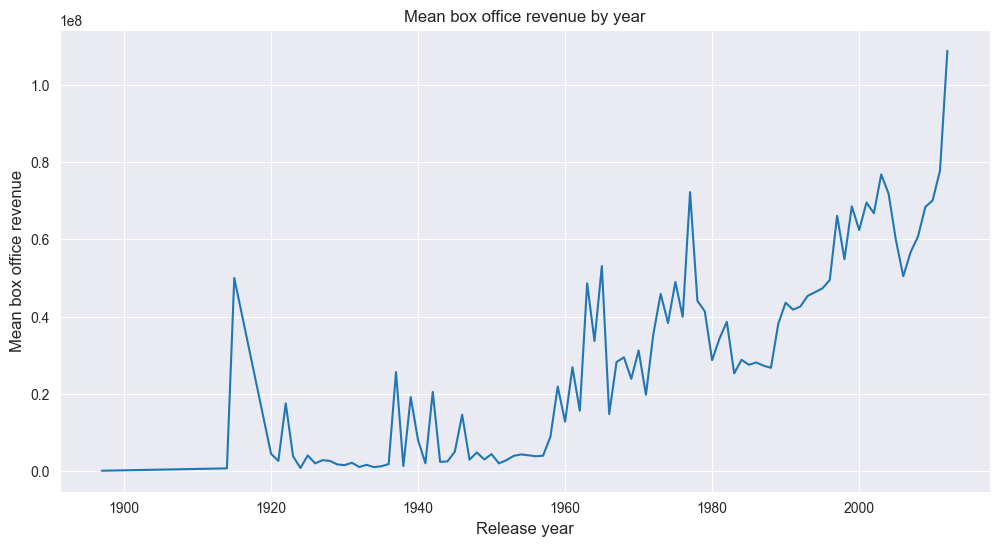

In [63]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)
ax.set_xlabel('Release year', fontsize = 12, )
ax.set_ylabel('Mean box office revenue', fontsize = 12)
ax.set_title('Mean box office revenue by year')
ax.set_label("Floats")
means_year = means_year[1:]
ax.plot(np.asarray(means_year.index, float), means_year.values)

plt.show()

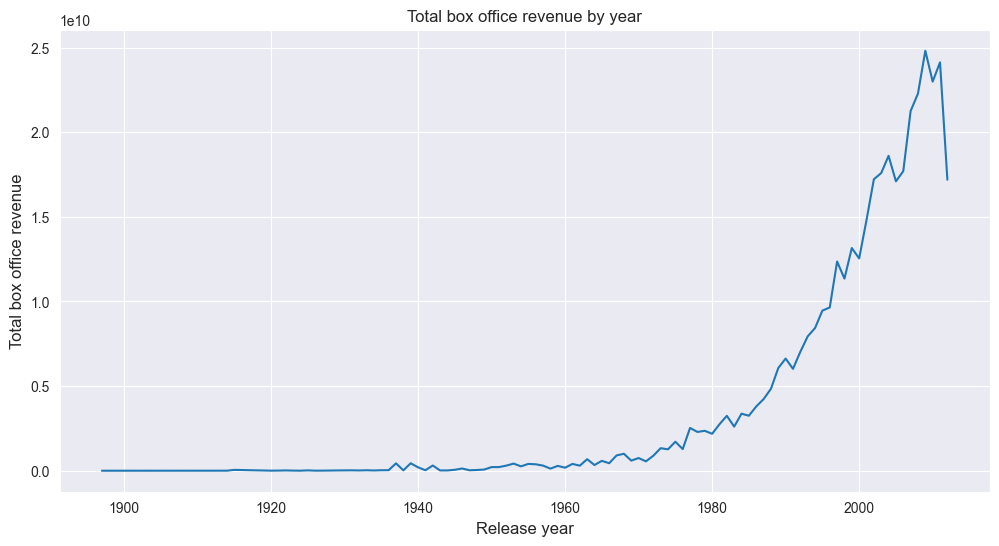

In [64]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)
ax.set_xlabel('Release year', fontsize = 12, )
ax.set_ylabel('Total box office revenue', fontsize = 12)
ax.set_title('Total box office revenue by year')
ax.set_label("Floats")
sums_year = sums_year[1:]
ax.plot(np.asarray(sums_year.index, float), sums_year.values)

plt.show()

In [83]:
groupped_years.nunique()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
Movie release year,,,,,,,,,
1010,1,1,1,1,1,1,1,1,1
1897,1,1,1,1,1,0,1,1,1
1914,4,4,4,4,4,1,2,1,4
1915,1,1,1,1,1,1,1,1,1
1920,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2008,367,367,367,176,367,70,90,85,337
2009,363,363,363,176,362,78,77,86,320
2010,328,328,328,173,328,75,61,64,284


In [65]:
def remove_first_and_last_chars(input_str: str) -> str:
    """
    Remove the first and last char of a string.
    :param input_str
    :return: processed string
    """
    if len(input_str) < 2:
        return ""
    return input_str[1:-1]

def separate_id_from_data(paired_string: str, remove_brackets=True) -> (str, str):
    """
    Separates "{"FreebaseID": "some string"}" strings into ("FreebaseID", "some string") tuples.
    :param paired_string: input paired string
    :param remove_brackets: if True, remove the leading and trailing curly brackets
    :return: said tuple of strings
    """
    if remove_brackets:
        paired_string = remove_first_and_last_chars(paired_string)

    ls = paired_string.split(":")
    for i, s in enumerate(ls):
        ls[i] = remove_first_and_last_chars(s.strip())

    if len(ls) < 2:
        return None, None
    return ls[0], ls[1]

def separate_ids_from_list_data(list_paired_string: str) -> (list, list):
    """
    Separates "{"FreebaseID1": "some string 1", "FreebaseID2": "some string 2", etc.}" strings
    into two lists: (["FreebaseID1", "FreebaseID2", ...], ["some string 1", "some string 2", ...]).
    :param list_paired_string: input list of pairs as string
    :return: said tuple of lists
    """
    list_paired_string = remove_first_and_last_chars(list_paired_string)
    split_pairs = list_paired_string.split(",")
    tupled_pairs = [separate_id_from_data(pair, remove_brackets=False) for pair in split_pairs]
    return [p[0] for p in tupled_pairs], [p[1] for p in tupled_pairs]

In [66]:
def col_to_col_values(column_name: str) -> str:
    """
    String formatting for value column names
    :param column_name: original column name
    :return: said formatted string
    """
    return f"{column_name}: values"

def append_processed_columns(df: pd.DataFrame, column_name: str):
    """
    Separate Freebase IDs from values
    :param df: data, modified in place
    :param column_name: name of column where to separate {Freebase ID: value} pairs
    """
    vals = df[column_name].apply(separate_ids_from_list_data).values
    df[f"{column_name}: Freebase IDs"] = [vals[i][0] for i in range(len(vals))]
    df[col_to_col_values(column_name)] = [vals[i][1] for i in range(len(vals))]
    df.drop(column_name, axis=1, inplace=True)

In [67]:
metadata_df = pd.read_csv('../data/movie.metadata.tsv', sep="\t")
metadata_df.rename(columns={"Movie countries (Freebase ID:name tuples)": "Movie countries",
                    "Movie genres (Freebase ID:name tuples)": "Movie genres"}, inplace=True)

cols_to_process = ["Movie countries", "Movie genres", "Movie languages"]
for col in cols_to_process:
    append_processed_columns(metadata_df, col)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,Movie genres: values,Movie languages: Freebase IDs,Movie languages: values
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,...",[/m/02h40lc],[English Language]
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]",[/m/02h40lc],[English Language]
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]",[/m/05f_3],[Norwegian Language]
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri...",[/m/02h40lc],[English Language]
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/0345h],[Germany],[/m/07s9rl0],[Drama],[/m/04306rv],[German Language]
...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[/m/09c7w0],[United States of America],[/m/07s9rl0],[Drama],[/m/02h40lc],[English Language]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"[/m/03rt9, /m/07ssc]","[Ireland, United Kingdom]","[/m/03bxz7, /m/07s9rl0, /m/0jtdp]","[Biographical film, Drama, Documentary]",[/m/02h40lc],[English Language]
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[/m/09c7w0],[United States of America],"[/m/06nbt, /m/01z4y]","[Satire, Comedy]",[/m/02h40lc],[English Language]
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[/m/03_3d],[Japan],"[/m/06n90, /m/0gw5n2f, /m/03k9fj, /m/0hcr, /m/...","[Science Fiction, Japanese Movies, Adventure, ...",[/m/03_9r],[Japanese Language]


In [68]:
def distinct_values(column_name: str) -> set:
    """
    Get all values from a column
    :param column_name: said column
    :return: set of values
    """
    return set.union(*metadata_df[col_to_col_values(column_name)].apply(set).values)

all_countries = distinct_values("Movie countries")
all_genres = distinct_values("Movie genres")
all_languages = distinct_values("Movie languages")

In [69]:
def name_appended_column(prefix: str, val: str) -> str:
    """
    Format column name
    :param prefix: str
    :param val: str
    :return: str
    """
    return f"{prefix}: {val}"

def append_indicator_columns(df: pd.DataFrame, all_values: set, column_name: str, prefix: str) -> pd.DataFrame:
    """
    Add columns to the right of a dataframe indicating whether a particular value is present or not
    in some initial column listing values of the same family
    :param df: data (not modified)
    :param all_values: all possible values
    :param column_name: column to inspect
    :param prefix: str
    :return: Dataframe with added columns
    """
    cols = [df[col_to_col_values(column_name)]
            .apply(lambda x: 1 if val in x else 0)
            .rename(name_appended_column(prefix, val))
            for val in all_values]
    cols.insert(0, df)
    return pd.concat(cols, axis=1)

In [70]:
if len(metadata_df.columns.values) < 700:
    for ls in [(all_countries, "Movie countries", "country"),
               (all_genres, "Movie genres", "genre"),
               (all_languages, "Movie languages", "lang")]:
        metadata_df = append_indicator_columns(metadata_df, *ls)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,Movie genres: values,...,lang: Korean Language,lang: Finnish Language,lang: Corsican Language,lang: Indonesian Language,lang: Serbo-Croatian,lang: Shanghainese,lang: Slovak Language,lang: Apach,lang: Tamang language,lang: \ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,...",...,0,0,0,0,0,0,0,0,0,0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]",...,0,0,0,0,0,0,0,0,0,0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]",...,0,0,0,0,0,0,0,0,0,0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri...",...,0,0,0,0,0,0,0,0,0,0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/0345h],[Germany],[/m/07s9rl0],[Drama],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[/m/09c7w0],[United States of America],[/m/07s9rl0],[Drama],...,0,0,0,0,0,0,0,0,0,0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"[/m/03rt9, /m/07ssc]","[Ireland, United Kingdom]","[/m/03bxz7, /m/07s9rl0, /m/0jtdp]","[Biographical film, Drama, Documentary]",...,0,0,0,0,0,0,0,0,0,0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[/m/09c7w0],[United States of America],"[/m/06nbt, /m/01z4y]","[Satire, Comedy]",...,0,0,0,0,0,0,0,0,0,0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[/m/03_3d],[Japan],"[/m/06n90, /m/0gw5n2f, /m/03k9fj, /m/0hcr, /m/...","[Science Fiction, Japanese Movies, Adventure, ...",...,0,0,0,0,0,0,0,0,0,0


In [71]:
from functools import cmp_to_key

def retrieve_n_most_frequent(df: pd.DataFrame, n: int, all_vals: list, prefix: str) -> list:
    """
    Retrieve the n most frequent genres, languages or countries
    :param df: data
    :param n: integer, max number of values to retrieve
    :param all_vals: all possible values
    :param prefix: str
    :return: said list
    """
    def comparator(val1, val2):
        mean_val1 = df[name_appended_column(prefix, val1)].mean()
        mean_val2 = df[name_appended_column(prefix, val2)].mean()
        return mean_val1 - mean_val2
    return sorted(all_vals, key=cmp_to_key(comparator), reverse=True)[:n]

def retrieve_frequent(df: pd.DataFrame, all_vals: list, prefix: str, freq_threshold=0.05) -> list:
    """
    Filter the values with a sufficiently high frequency
    :param df: data
    :param all_vals: all possible values
    :param prefix: str
    :param freq_threshold: float
    :return: list of sufficiently frequent values
    """
    return list(
        filter(
            lambda val: df[name_appended_column(prefix, val)].mean() > freq_threshold,
            all_vals
        )
    )

In [72]:
most_freq_genres = retrieve_n_most_frequent(metadata_df, 30, all_genres, "genre")

In [73]:
reduced = metadata_df[metadata_df["Movie box office revenue"].notnull()]
sig_level = 0.05
correlated_genres_to_revenue = []

for genre in most_freq_genres:
    res = stats.spearmanr(reduced["Movie box office revenue"], reduced[name_appended_column("genre", genre)])
    print(f"{genre} :: corr = {res.correlation}, p-value = {res.pvalue}")
    if res.pvalue < sig_level:
        correlated_genres_to_revenue.append(genre)

Drama :: corr = -0.0884198087071858, p-value = 4.700756169534344e-16
Comedy :: corr = 0.0987949264809276, p-value = 1.1252836634517524e-19
Romance Film :: corr = 0.0023182830038962266, p-value = 0.8317517216759166
Black-and-white :: corr = -0.19043617176490096, p-value = 1.9364404608536852e-69
Action :: corr = 0.2006732050790237, p-value = 4.694889725205454e-77
Thriller :: corr = 0.1839936523482882, p-value = 7.2652888741231656e-65
Short Film :: corr = -0.010220590261029375, p-value = 0.3489265866396539
World cinema :: corr = -0.07945969468001594, p-value = 3.020385326018935e-13
Crime Fiction :: corr = 0.05451840889330515, p-value = 5.734009153448597e-07
Indie :: corr = -0.22417629927882496, p-value = 3.539076430628446e-96
Documentary :: corr = -0.11342578524204991, p-value = 1.8398853028461515e-25
Horror :: corr = 0.040941396276008374, p-value = 0.0001743271197207884
Silent film :: corr = -0.04904716523920155, p-value = 6.874023750513465e-06
Adventure :: corr = 0.1858832055833701, p-v

In [74]:
print(correlated_genres_to_revenue)
print(len(correlated_genres_to_revenue))

['Drama', 'Comedy', 'Black-and-white', 'Action', 'Thriller', 'World cinema', 'Crime Fiction', 'Indie', 'Documentary', 'Horror', 'Silent film', 'Adventure', 'Family Film', 'Action/Adventure', 'Comedy film', 'Musical', 'Animation', 'Mystery', 'Science Fiction', 'Fantasy', 'Romantic comedy', 'Japanese Movies', 'Western', 'Crime Thriller']
24


In [75]:
print(retrieve_frequent(metadata_df, all_genres, "genre", freq_threshold=0.03))

['Action/Adventure', 'Documentary', 'Thriller', 'Crime Fiction', 'Family Film', 'Silent film', 'Horror', 'Animation', 'Romantic comedy', 'Short Film', 'Adventure', 'Drama', 'Mystery', 'Musical', 'World cinema', 'War film', 'Science Fiction', 'Black-and-white', 'Action', 'Fantasy', 'Comedy', 'Comedy film', 'Romance Film', 'Romantic drama', 'Indie']


In [76]:
def freebase_to_wiki_id(freebase_id) -> str | None:
    """
    Query Wikidata ID from Freebase ID
    :param freebase_id: str
    :return: corresponding wiki ID
    """
    url = f"https://www.wikidata.org/w/index.php?search={freebase_id}&title=Special%3ASearch&go=Go"
    res = BeautifulSoup(requests.get(url).text, "html.parser")\
        .find("div", {"class": "mw-search-result-heading"})
    if res is not None:
        return res.find("a")["href"].split("/")[-1]
    return None

In [77]:
path_corenlp = '../data/corenlp_plot_summaries/'

def parse_summaries(file: str) -> BeautifulSoup:
    """
    Parse XML npl processed summary
    :param file: name of
    :return: BeautifulSoup object
    """
    with gzip.open(path_corenlp + file, 'rb') as f:
        data = f.read()
    return BeautifulSoup(data, features="xml")

In [80]:
meta_with_revenue = metadata_df[metadata_df["Movie box office revenue"].notnull()]
genre_str = "genre"
for genre in retrieve_frequent(metadata_df, all_genres, "genre", freq_threshold=0.03):
    print(f"{genre} | frequency in sample: {meta_with_revenue[name_appended_column(genre_str, genre)].mean()}, in total: {metadata_df[name_appended_column(genre_str, genre)].mean()}")

Action/Adventure | frequency in sample: 0.16200452327103917, in total: 0.055798191849867264
Documentary | frequency in sample: 0.022616355195810022, in total: 0.06887608421722269
Thriller | frequency in sample: 0.23425782644923224, in total: 0.10697202138461727
Crime Fiction | frequency in sample: 0.15271991429591716, in total: 0.08500018350644108
Family Film | frequency in sample: 0.1007022973455541, in total: 0.056250841071188266
Silent film | frequency in sample: 0.003928103797167004, in total: 0.06422725437662861
Horror | frequency in sample: 0.09260802285442209, in total: 0.06459426725878079
Animation | frequency in sample: 0.03963813831686704, in total: 0.043234117517524866
Romantic comedy | frequency in sample: 0.10689203666230211, in total: 0.03278648413892661
Short Film | frequency in sample: 0.0033329365551720033, in total: 0.09959506245335878
Adventure | frequency in sample: 0.13903106773003213, in total: 0.060716164470706255
Drama | frequency in sample: 0.5150577312224736, 

<AxesSubplot: xlabel='Movie box office revenue', ylabel='Count'>

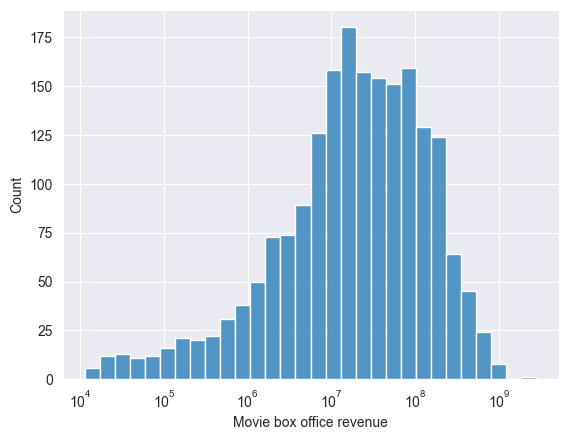

In [86]:
rev_thriller = meta_with_revenue[meta_with_revenue[name_appended_column("genre", "Thriller")] == 1]
sns.histplot(data=rev_thriller["Movie box office revenue"], log_scale=True)

<AxesSubplot: xlabel='Movie box office revenue', ylabel='Count'>

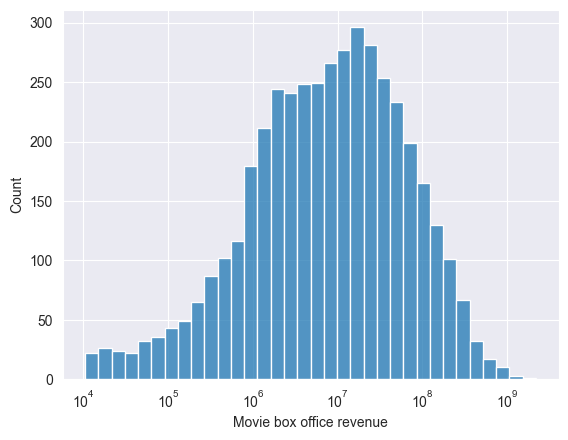

In [87]:
rev_thriller = meta_with_revenue[meta_with_revenue[name_appended_column("genre", "Drama")] == 1]
sns.histplot(data=rev_thriller["Movie box office revenue"], log_scale=True)

<AxesSubplot: xlabel='Movie box office revenue', ylabel='Count'>

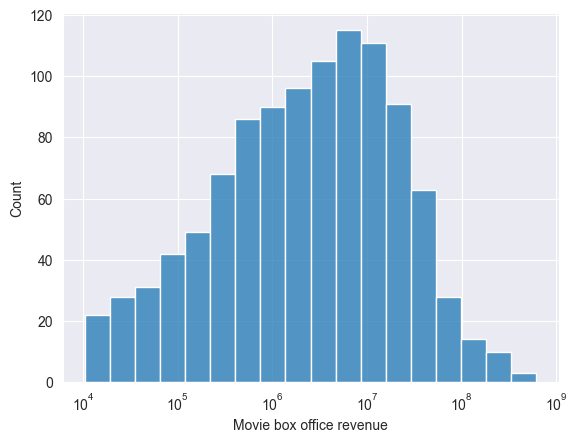

In [88]:
rev_thriller = meta_with_revenue[meta_with_revenue[name_appended_column("genre", "Indie")] == 1]
sns.histplot(data=rev_thriller["Movie box office revenue"], log_scale=True)

<AxesSubplot: xlabel='Movie box office revenue', ylabel='Count'>

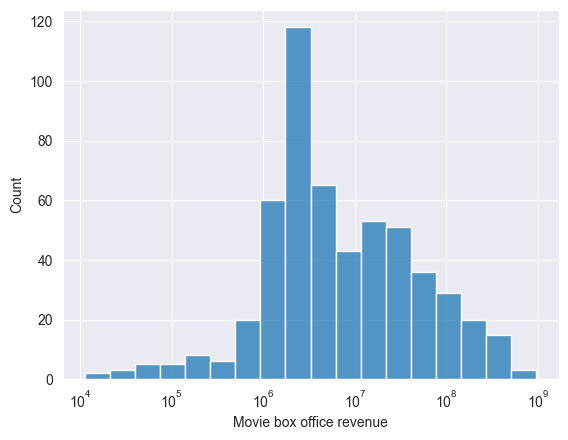

In [90]:
rev_thriller = meta_with_revenue[meta_with_revenue[name_appended_column("genre", "Musical")] == 1]
sns.histplot(data=rev_thriller["Movie box office revenue"], log_scale=True)

<AxesSubplot: xlabel='Movie box office revenue', ylabel='Count'>

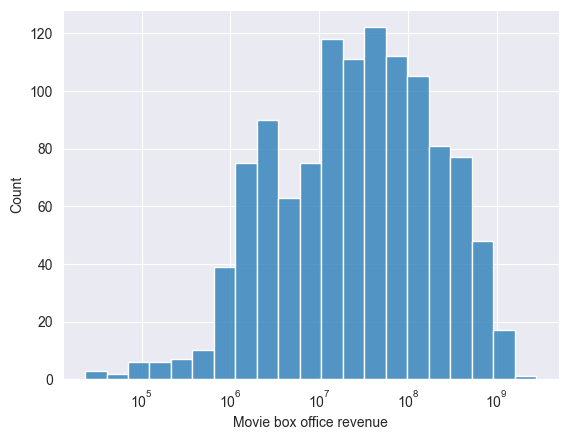

In [91]:
rev_thriller = meta_with_revenue[meta_with_revenue[name_appended_column("genre", "Adventure")] == 1]
sns.histplot(data=rev_thriller["Movie box office revenue"], log_scale=True)